<a href="https://colab.research.google.com/github/repoocsov/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [x] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Begin with baselines for classification.
- [x] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [x] Get your validation accuracy score.
- [x] Get and plot your feature importances.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 194kB 2.9MB/s 
     |████████████████████████████████| 614kB 46.4MB/s 
     |████████████████████████████████| 1.5MB 36.6MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 235kB 48.3MB/s 
     |████████████████████████████████| 307kB 48.0MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 215kB 42.2MB/s 
     |████████████████████████████████| 747kB 32.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=673be0005378697aee223fd4ebde76146bd1b2597107589bf1f5842113513c5d
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

'2.5.0'

In [4]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [8]:
"""####################################################################
####################### SPLITTING #####################################
####################################################################"""

# Import the library to split from sklearn
from sklearn.model_selection import train_test_split

# Splitting. (stratify means keep proportions between val and train similar based on this catagory)
train, val = train_test_split(train, train_size=.80, test_size=.20,
                              stratify=train['status_group'], random_state=256)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [12]:
"""########################################################
###################### BASELINE ###########################
########################################################"""

print('Train', train['status_group'].value_counts(normalize=True))
print('\n\nValidation', val['status_group'].value_counts(normalize=True))

# Can see the stratification here. Mean baseline is assuming functional which would be 54% accurate

Train functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64


Validation functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64


In [0]:
"""#############################################################
####################### FEATURE SELECTION ######################
#############################################################"""


""" CLEANING """
# Function to clean dirty longitude and latitudes
import numpy as np

def wrangle(X):
    # Prevent SettingWithCopyWarning
    X = X.copy()

    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    cols_with_zeros = ['longitude', 'latitude']
  
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            

    X = X.drop(columns='quantity_group')
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [15]:
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [19]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)


pipeline.fit(X_train, y_train)

print('Validation accuracy with a logistic model:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.7352693602693603


In [33]:
# Get target predictions for test data based on model
y_pred_logistic = pipeline.predict(X_test)
y_pred_logistic

array(['non functional', 'non functional', 'functional', ...,
       'functional needs repair', 'functional', 'non functional'],
      dtype=object)

In [25]:
""" DECISION TREE MODEL """

from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(min_samples_leaf=20, random_state=256)
)

pipeline.fit(X_train, y_train)

print('Train score with a decision tree model:', pipeline.score(X_train, y_train))
print('\nValidation score with a decision tree model:', pipeline.score(X_val, y_val))

Train score with a decision tree model: 0.8091750841750842

Validation score with a decision tree model: 0.7651515151515151


In [34]:
# Predicted test targets based on model
y_pred_tree = pipeline.predict(X_test)
y_pred_tree

array(['non functional', 'non functional', 'functional', ...,
       'functional needs repair', 'functional', 'non functional'],
      dtype=object)

In [0]:
"""
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
"""

In [26]:
"""#############################################################
###################### FEATURE IMPORTANCE ######################
#############################################################"""

model = pipeline.named_steps['decisiontreeclassifier']
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=256, splitter='best')

In [28]:
# Feature importance (Gini values) of our tree classifier model

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

# Columns after one hot encoding
encoded_columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year',
       'basin_Lake Victoria',
       ...
       'waterpoint_type_other', 'waterpoint_type_improved spring',
       'waterpoint_type_cattle trough', 'waterpoint_type_dam',
       'waterpoint_type_group_hand pump',
       'waterpoint_type_group_communal standpipe',
       'waterpoint_type_group_other', 'waterpoint_type_group_improved spring',
       'waterpoint_type_group_cattle trough', 'waterpoint_type_group_dam'],
      dtype='object', length=180)

In [29]:
importances = pd.Series(model.feature_importances_, encoded_columns)
importances

amount_tsh                                  0.034295
gps_height                                  0.029138
longitude                                   0.113742
latitude                                    0.084784
num_private                                 0.000099
                                              ...   
waterpoint_type_group_communal standpipe    0.001693
waterpoint_type_group_other                 0.000000
waterpoint_type_group_improved spring       0.000216
waterpoint_type_group_cattle trough         0.000327
waterpoint_type_group_dam                   0.000000
Length: 180, dtype: float64

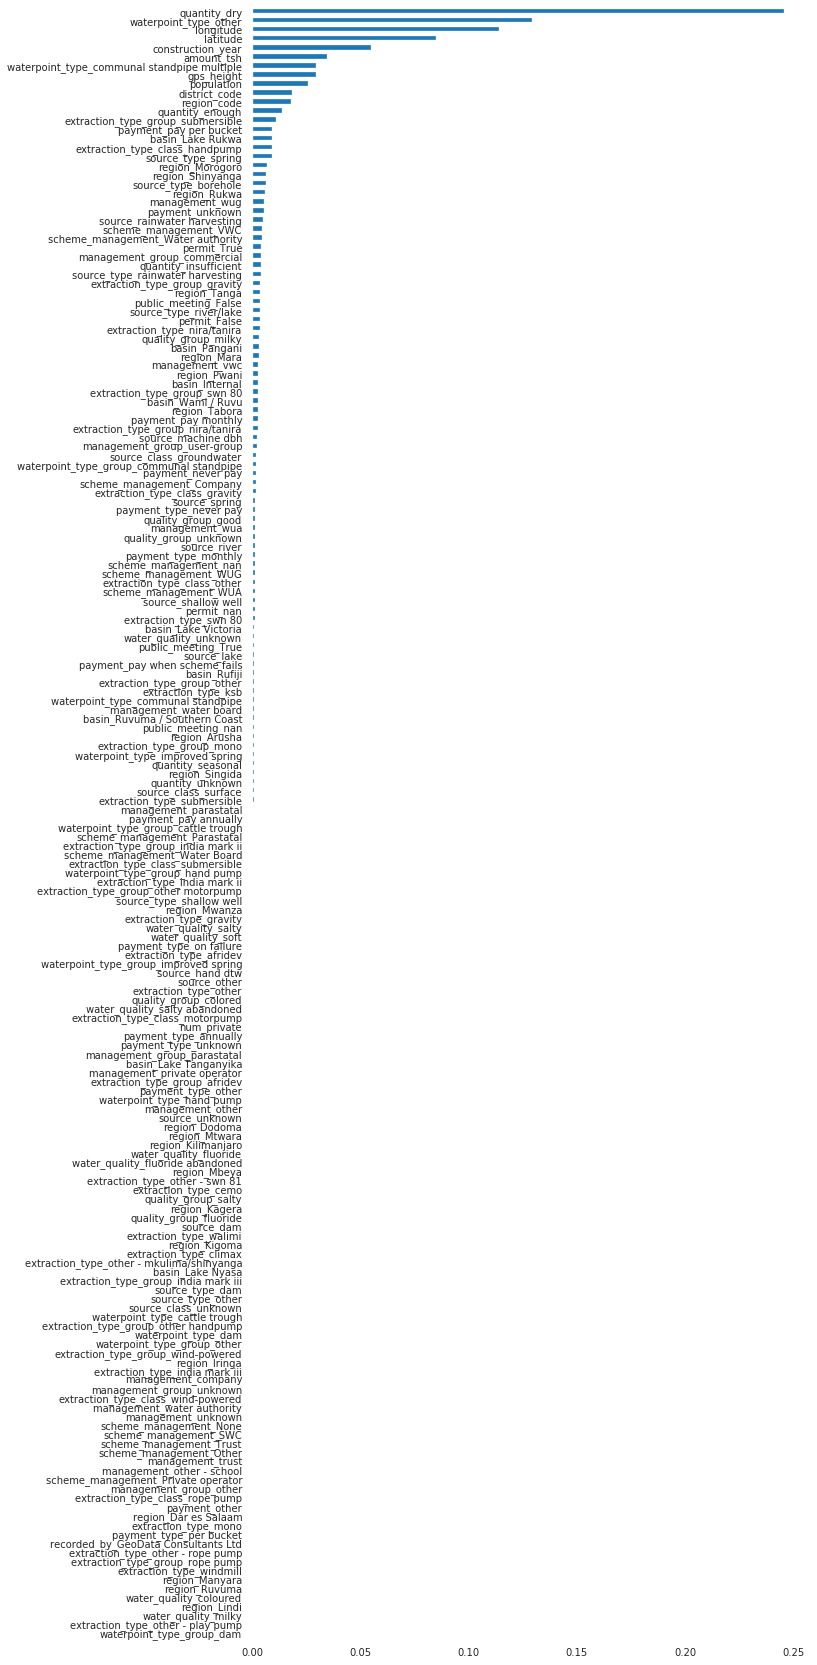

In [31]:
# Plotting
import matplotlib.pyplot as plt


plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()

In [36]:
"""#############################################################
#################### PREDICTIONS/CSV BUILDING ##################
#############################################################"""

# Tree: y_pred_tree
# Logistic: y_pred_logistic

sample_submission

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional
...,...,...
14353,39307,functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


In [37]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission

,id,status_group
0,50785,non functional
1,51630,non functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional needs repair
14356,33492,functional


In [0]:
# Convert to csv
submission.to_csv('Cooper_Vos_Submission_1', index=False)

In [0]:
# Downloading csv
from google.colab import files

In [0]:
files.download('Cooper_Vos_Submission_1')